### Vấn đề về chất thải luôn được đặt lên hàng đầu ở các quốc gia châu Âu, liệu những năm gần đây tổng lượng chất thải được tiêu thụ (final consumption) từ các nước châu Âu có xu hướng như thế nào?
Các điều rút ra khi trả lời được câu hỏi trên:
- Lượng chất khải công nghiệp có giảm qua các năm khi công nghiệp ở châu Âu ngày càng hiện đại?
- Nước nào ở châu Âu có lượng chất thải công nghiệp lớn nhất ?

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('Europe_new.csv')
df.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.0,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.0,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.0,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.0,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.0,additives_and_oxygenates


In [21]:
industry_wastes = df.loc[df['commodity_transaction'] == "Industrial waste - Final consumption"]
industry_wastes

,country_or_area,commodity_transaction,year,unit,quantity,category
185771,Austria,Industrial waste - Final consumption,2014,Terajoules,10577.0,industrial_waste
185772,Austria,Industrial waste - Final consumption,2013,Terajoules,9589.0,industrial_waste
185773,Austria,Industrial waste - Final consumption,2012,Terajoules,10288.0,industrial_waste
185774,Austria,Industrial waste - Final consumption,2011,Terajoules,13162.0,industrial_waste
185775,Austria,Industrial waste - Final consumption,2010,Terajoules,12636.0,industrial_waste
...,...,...,...,...,...,...
186115,United Kingdom,Industrial waste - Final consumption,1994,Terajoules,1591.0,industrial_waste
186116,United Kingdom,Industrial waste - Final consumption,1993,Terajoules,1313.0,industrial_waste
186117,United Kingdom,Industrial waste - Final consumption,1992,Terajoules,1074.0,industrial_waste
186118,United Kingdom,Industrial waste - Final consumption,1991,Terajoules,676.0,industrial_waste


Lọc ra những unique country và unique year

In [62]:
countries = industry_wastes["country_or_area"]
years = industry_wastes["year"]
quantities = industry_wastes["quantity"]
unique_countries = countries.unique()
unique_years = years.unique()
print(unique_countries)
print(unique_years)
years = years.to_numpy()
countries = countries.to_numpy()
quantities = quantities.to_numpy()

['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Finland'
 'France' 'Germany' 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Luxembourg'
 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'United Kingdom']
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990]


Tính tổng lượng chất thải công nghiệp qua các năm

In [46]:
waste_follow_years = []
for year in unique_years:
    waste_sum = 0
    for i in range(0, len(years)):
        if year == years[i]:
            waste_sum += quantities[i]
    waste_follow_years.append(waste_sum)
waste_follow_years

[121843.0,
 108726.0,
 104512.0,
 104897.0,
 105496.0,
 99378.0,
 86470.0,
 54504.0,
 56885.0,
 54348.0,
 59890.0,
 45169.0,
 41679.0,
 39134.0,
 50618.0,
 45648.0,
 44180.0,
 66367.0,
 68752.0,
 82758.0,
 70929.0,
 63909.0,
 76065.0,
 39760.0,
 35250.0]

Trực quan về kết quả lượng chất thải công nghiệp tiêu thụ qua các năm:

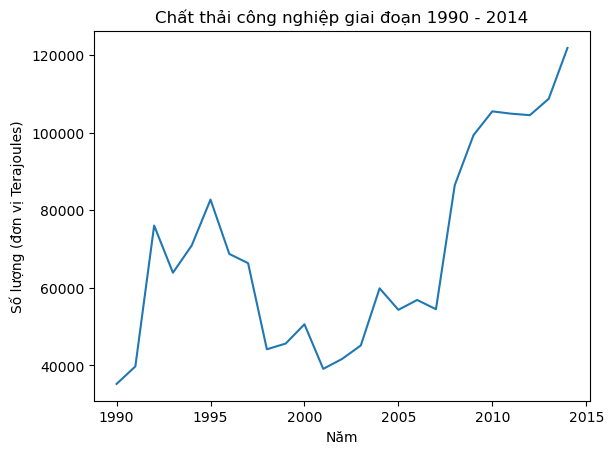

In [54]:
plt.plot(unique_years, waste_follow_years)
plt.xlabel("Năm")
plt.ylabel("Số lượng (đơn vị Terajoules)")
plt.title("Chất thải công nghiệp giai đoạn 1990 - 2014")
plt.show()

Qua biểu đồ trên ta có thể thấy:
- Giai đoạn 2000 - 2006, lượng chất thải công nghiệp được tiêu thụ có xu hướng giảm hơn so với 1990 - 2000
- Giai đoạn 2006 - 2014, lượng chất thải công nghiệp được tiêu thụ tăng chóng mặt, điều này có thể dễ lý giải vì trong những năm gần đây, ngành công nghiệp đã có những bước tiến vượt bậc, và không ngoại trừ châu Âu (cái nôi của ngành Công nghiệp hiện đại)

Chuyển sang sự tiêu thụ chất thải Công nghiệp của từng nước

In [55]:
unique_countries

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Italy',
       'Latvia', 'Luxembourg', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'United Kingdom'], dtype=object)

In [65]:
waste_follow_countries = []
for country in unique_countries:
    waste_sum = 0
    for i in range(0, len(countries)):
        if country == countries[i]:
            waste_sum += quantities[i]
    waste_follow_countries.append(waste_sum)
waste_follow_countries

[220128.0,
 119238.0,
 13754.0,
 3732.0,
 1700.0,
 67495.0,
 28105.0,
 311.0,
 222161.0,
 12722.0,
 17.0,
 117272.0,
 3066.0,
 9011.0,
 328664.0,
 22540.0,
 40414.0,
 383166.0,
 88157.0,
 9275.0,
 20011.0,
 795.0,
 15433.0]

Trực quan về lượng chất thải công nghiệp tiêu thụ của từng quốc gia:

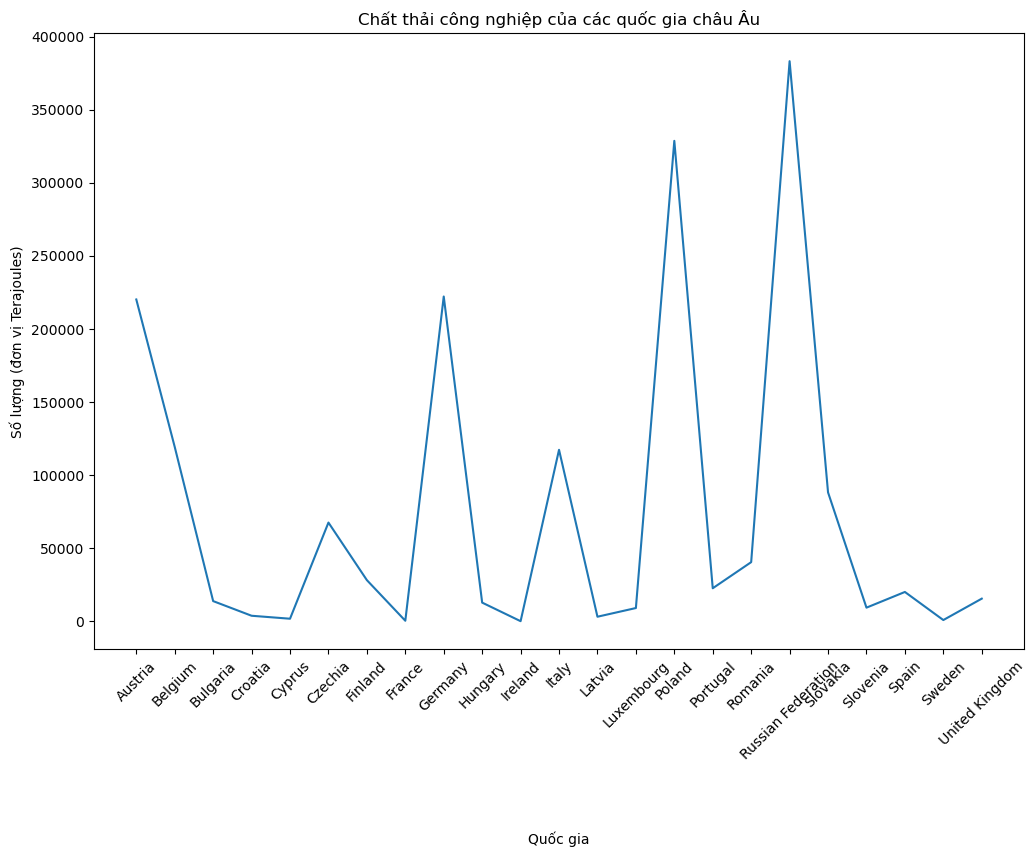

In [103]:
plt.figure(figsize=(12, 8))
plt.plot(unique_countries, waste_follow_countries)
plt.xlabel("Quốc gia",labelpad = 50)
plt.ylabel("Số lượng (đơn vị Terajoules)")
plt.title("Chất thải công nghiệp của các quốc gia châu Âu")
plt.xticks(rotation = 45)
plt.show()

Qua biểu đồ trên ta có thể rút ra một vài nhận xét:
- Đa phần các quốc gia châu Âu có lượng tiêu thụ chất thải công nghiệp tương đối như nhau
- Một vài quốc gia vượt trội hơn cả: Austria, Germany, Poland, và Russian Federation.